<a href="https://colab.research.google.com/github/Gauravmehra1/Airbnb/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
File =('/content/drive/MyDrive/EDA/AirbnbNYC.csv')
df=pd.read_csv(File)

In [18]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.shape

(48895, 16)

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

##**id**

In [ ]:
df['id'].head()

0    2539
1    2595
2    3647
3    3831
4    5022
Name: id, dtype: int64

In [ ]:
df['id'].shape

(48895,)

In [ ]:
df['id'].unique()

array([    2539,     2595,     3647, ..., 36485431, 36485609, 36487245])

In [ ]:
pd.value_counts(df['id'].values)

2539        1
25583366    1
25551687    1
25552076    1
25554120    1
           ..
13121809    1
13122135    1
13122318    1
13122932    1
36487245    1
Length: 48895, dtype: int64

#**name**

In [ ]:
df['name'].head()

In [ ]:
df['name'].unique

In [ ]:
df['name'].value_counts()

In [ ]:
df.drop_duplicates(['name'],inplace=True)
df

In [ ]:
df['name'].value_counts()

Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Large 1BR Apt. in Williamsburg                         1
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: name, Length: 47905, dtype: int64

In [ ]:
df[df['name']=='Hillside Hotel']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,2017-07-23,0.08,18,90


#**host_id**

In [ ]:
df['host_id'].head()

0    2787
1    2845
2    4632
3    4869
4    7192
Name: host_id, dtype: int64

In [ ]:
df['host_id'].unique

<bound method Series.unique of 0            2787
1            2845
2            4632
3            4869
4            7192
           ...   
48890     8232441
48891     6570630
48892    23492952
48893    30985759
48894    68119814
Name: host_id, Length: 48895, dtype: int64>

In [ ]:
df['host_id'].value_counts('0')

219517861    0.006688
107434423    0.004745
30283594     0.002475
137358866    0.002107
16098958     0.001963
               ...   
23727216     0.000020
89211125     0.000020
19928013     0.000020
1017772      0.000020
68119814     0.000020
Name: host_id, Length: 37457, dtype: float64

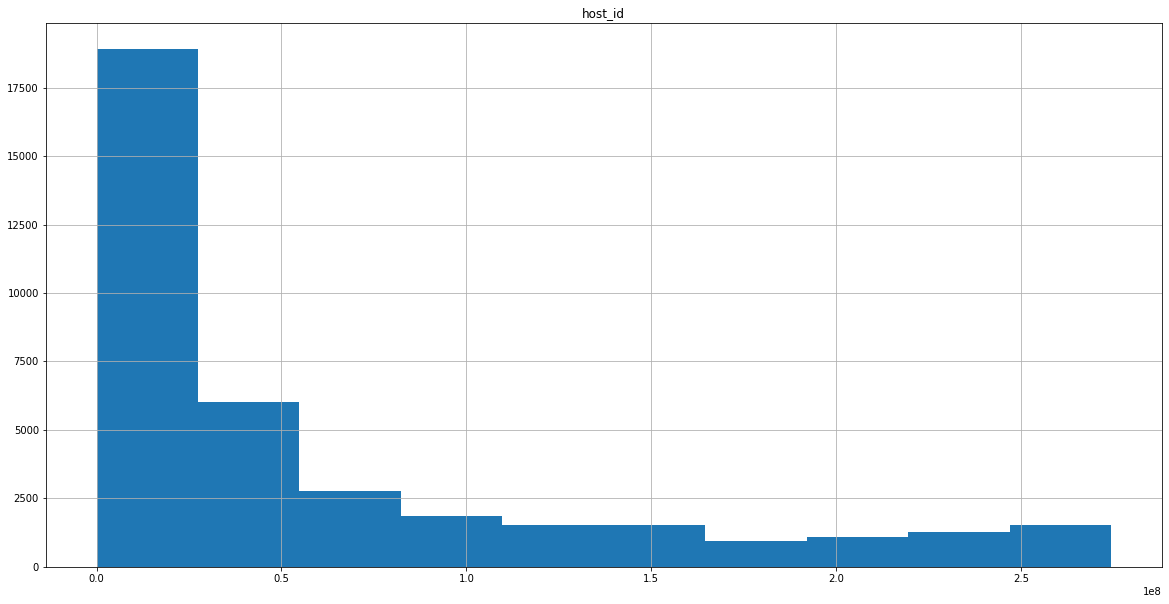

In [ ]:
df.hist('host_id');

#**neighbourhood_group**

In [ ]:
df['neighbourhood_group'].head()

0     Brooklyn
1    Manhattan
2    Manhattan
3     Brooklyn
4    Manhattan
Name: neighbourhood_group, dtype: object

In [ ]:
df['neighbourhood_group'].unique

<bound method Series.unique of 0         Brooklyn
1        Manhattan
2        Manhattan
3         Brooklyn
4        Manhattan
           ...    
48890     Brooklyn
48891     Brooklyn
48892    Manhattan
48893    Manhattan
48894    Manhattan
Name: neighbourhood_group, Length: 48895, dtype: object>

In [ ]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

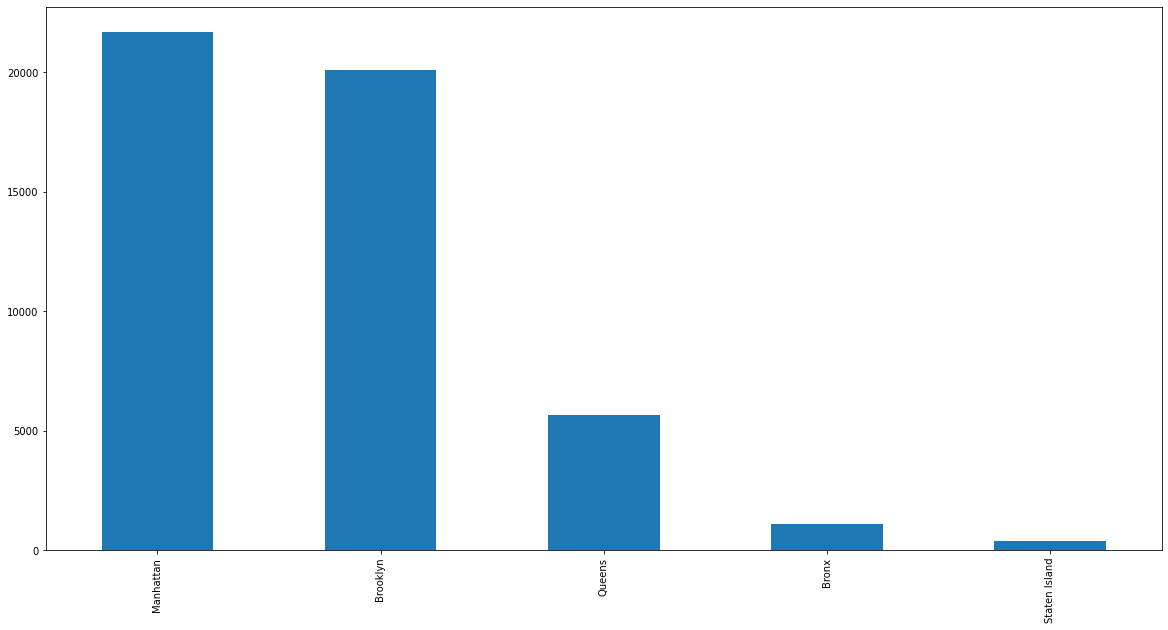

In [ ]:

plt.rcParams['figure.figsize'] = (20, 10)
df['neighbourhood_group'].value_counts().plot(kind='bar')

#**host_name**

In [ ]:
df['host_name'].head()

In [ ]:
df['host_name'].unique

In [ ]:
df['host_name'].value_counts()

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64

#**neighbourhood**

In [ ]:
df['neighbourhood']

In [ ]:
df['neighbourhood'].unique

In [ ]:
df['neighbourhood'].value_counts()

In [ ]:
df.groupby('neighbourhood')['neighbourhood_group'].max().reset_index()

In [ ]:
df['neighbourhood'].value_counts()

#**latitude**

In [ ]:
df['latitude']

In [ ]:
df['latitude'].unique

In [47]:
df['latitude'].value_counts()

40.71813    18
40.68444    13
40.69414    13
40.68634    13
40.76125    12
            ..
40.78084     1
40.66767     1
40.77473     1
40.79343     1
40.81475     1
Name: latitude, Length: 19048, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff07c682550>]],
      dtype=object)

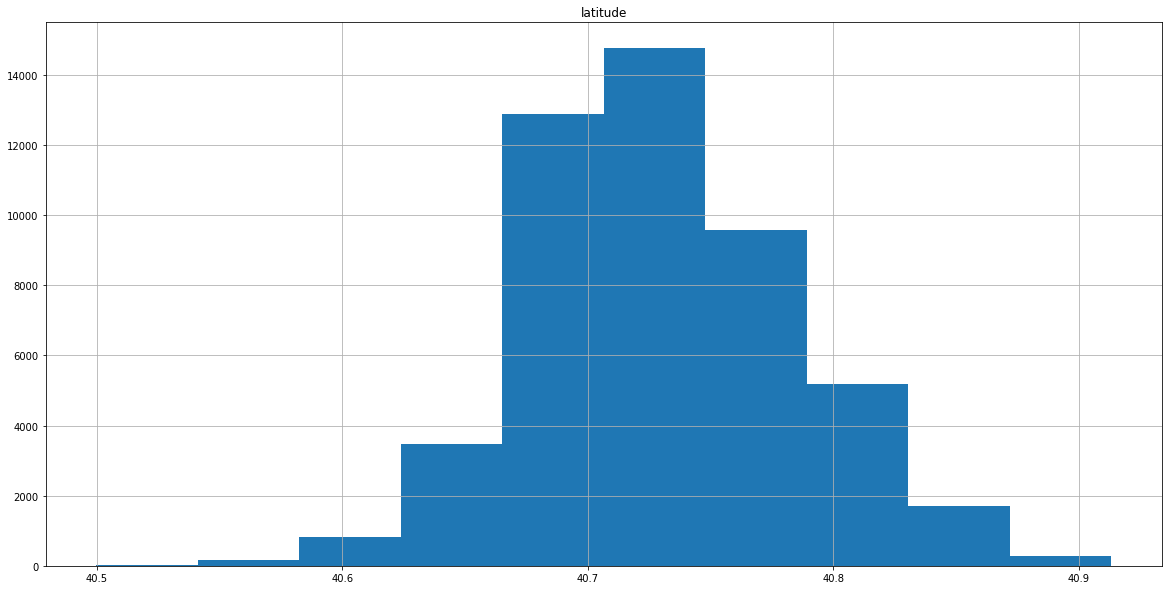

In [46]:
df.hist('latitude')

#**longitude**

In [48]:
df['longitude']

0       -73.97237
1       -73.98377
2       -73.94190
3       -73.95976
4       -73.94399
           ...   
48890   -73.94995
48891   -73.93317
48892   -73.94867
48893   -73.99112
48894   -73.98933
Name: longitude, Length: 48895, dtype: float64

In [ ]:
df['longitude'].unique

In [52]:
df['longitude'].value_counts()

-73.95677    18
-73.95427    18
-73.95405    17
-73.95060    16
-73.94791    16
             ..
-73.85155     1
-73.83167     1
-73.85058     1
-73.79232     1
-73.80844     1
Name: longitude, Length: 14718, dtype: int64

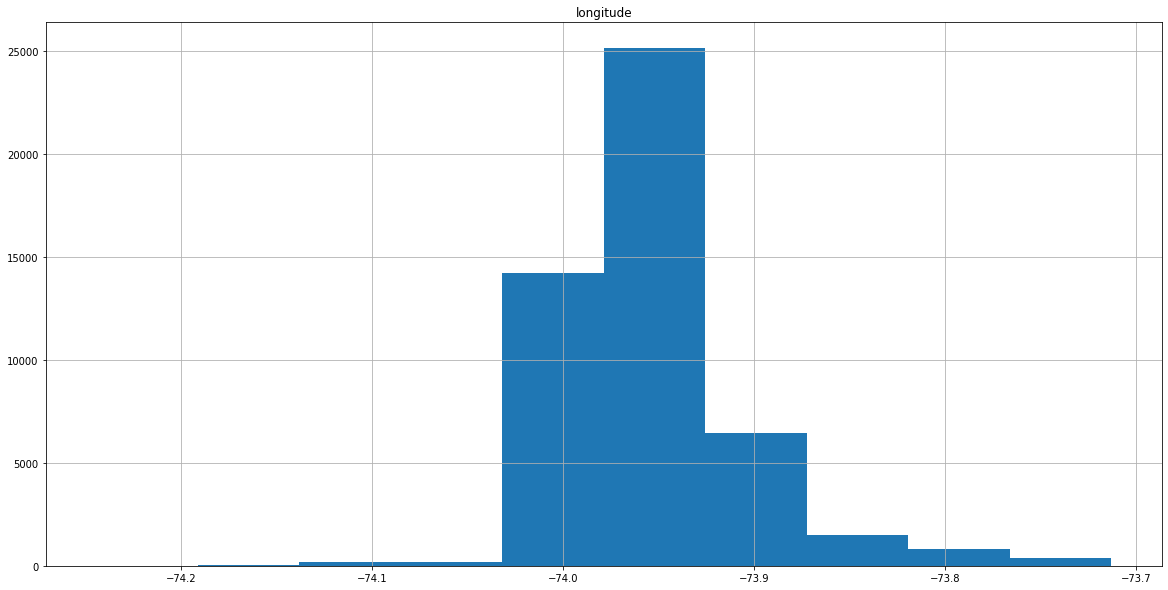

In [51]:
df.hist('longitude');